In [ ]:
#first we import libraries

In [1]:
import os
import pandas as pd

In [ ]:
#then we will see that how many csv files we have in our folder (Omema_Data)

In [2]:
path = "C:/Users/Fujitsu-Pc/Desktop/PARKO/Omema_Data"
os.listdir(path) 

['TRENDYGO_April_2019.csv',
 'TRENDYGO_August_2019.csv',
 'TRENDYGO_February_2019..csv',
 'TRENDYGO_January_2019.csv',
 'TRENDYGO_July_2019.csv',
 'TRENDYGO_June_2019.csv',
 'TRENDYGO_March_2019.csv',
 'TRENDYGO_May_2019.csv']

In [ ]:
#then we combined all data from each csv file into one csv file

In [3]:
path = "C:/Users/Fujitsu-Pc/Desktop/PARKO/Omema_Data"
files = [file for file in os.listdir(path) if not file.startswith('.')]
all_months_data = pd.DataFrame()
for file in files:
    my_data = pd.read_csv(path+"/"+file)
    all_months_data = pd.concat([all_months_data, my_data ])
all_months_data.to_csv('all_data.csv',index=False)

In [ ]:
#then we will read our file 

In [4]:
all_data = pd.read_csv('all_data.csv')
all_data.head(100)

,Order ID,Accessorie,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558.0,Sunglasses,2.0,11.95,4/19/2019 8:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559.0,Necklace,1.0,99.99,4/7/2019 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560.0,Watch,1.0,600.00,4/12/2019 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560.0,Socks,1.0,11.99,4/12/2019 14:38,"669 Spruce St, Los Angeles, CA 90001"
...,...,...,...,...,...,...
95,176648.0,Earmuffs,1.0,149.99,4/24/2019 1:17,"732 2nd St, Portland, OR 97035"
96,176649.0,Hair band,1.0,11.95,4/9/2019 8:49,"702 11th St, San Francisco, CA 94016"
97,176650.0,Safety pin,1.0,14.95,4/12/2019 16:47,"153 River St, Boston, MA 02215"
98,176651.0,Pocket watch,1.0,700.00,4/7/2019 13:14,"997 South St, Boston, MA 02215"


In [ ]:
#then we find empty data (nan)

In [5]:
nan_df = all_data[all_data.isna().any(axis=1)]
display(nan_df.head())

,Order ID,Accessorie,Quantity Ordered,Price Each,Order Date,Purchase Address
1,NaN,NaN,NaN,NaN,NaN,NaN
16,NaN,NaN,NaN,NaN,NaN,NaN
25,NaN,NaN,NaN,NaN,NaN,NaN
37,NaN,NaN,NaN,NaN,NaN,NaN
356,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
#then we clean our data from (nan)

In [6]:
all_data = all_data.dropna(how='all')
all_data.head()

,Order ID,Accessorie,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558.0,Sunglasses,2.0,11.95,4/19/2019 8:46,"917 1st St, Dallas, TX 75001"
2,176559.0,Necklace,1.0,99.99,4/7/2019 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560.0,Watch,1.0,600.00,4/12/2019 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560.0,Socks,1.0,11.99,4/12/2019 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561.0,Tie,1.0,11.99,4/30/2019 9:27,"333 8th St, Los Angeles, CA 90001"


In [ ]:
#remove text from order date column

In [10]:
all_data = all_data[all_data['Order Date'].str[0:1]!='Or']

In [11]:
all_data['Quantity Ordered'] = pd.to_numeric(all_data['Quantity Ordered'])
all_data['Price Each'] = pd.to_numeric(all_data['Price Each'])

In [ ]:
#we can seperate month column

In [12]:
all_data['Month'] = all_data['Order Date'].str[0:1]
all_data['Month'] = all_data['Month'].astype('int32')
all_data.head()

,Order ID,Accessorie,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558.0,Sunglasses,2.0,11.95,4/19/2019 8:46,"917 1st St, Dallas, TX 75001",4
2,176559.0,Necklace,1.0,99.99,4/7/2019 22:30,"682 Chestnut St, Boston, MA 02215",4
3,176560.0,Watch,1.0,600.00,4/12/2019 14:38,"669 Spruce St, Los Angeles, CA 90001",4
4,176560.0,Socks,1.0,11.99,4/12/2019 14:38,"669 Spruce St, Los Angeles, CA 90001",4
5,176561.0,Tie,1.0,11.99,4/30/2019 9:27,"333 8th St, Los Angeles, CA 90001",4


In [ ]:
#which month column you want to make 

In [34]:
all_data['Month 8'] = pd.to_datetime(all_data['Order Date']).dt.month
all_data.head()

,Order ID,Accessorie,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Month 2,Month 3,Month 8,City,Sales,Hour,Minute,Count
0,176558.0,Sunglasses,2.0,11.95,4/19/2019 8:46,"917 1st St, Dallas, TX 75001",4,4,4,4,Dallas (TX),23.90,8,46,1
2,176559.0,Necklace,1.0,99.99,4/7/2019 22:30,"682 Chestnut St, Boston, MA 02215",4,4,4,4,Boston (MA),99.99,22,30,1
3,176560.0,Watch,1.0,600.00,4/12/2019 14:38,"669 Spruce St, Los Angeles, CA 90001",4,4,4,4,Los Angeles (CA),600.00,14,38,1
4,176560.0,Socks,1.0,11.99,4/12/2019 14:38,"669 Spruce St, Los Angeles, CA 90001",4,4,4,4,Los Angeles (CA),11.99,14,38,1
5,176561.0,Tie,1.0,11.99,4/30/2019 9:27,"333 8th St, Los Angeles, CA 90001",4,4,4,4,Los Angeles (CA),11.99,9,27,1


In [ ]:
#Add city column

In [16]:
def get_city(address):
    return address.split(",")[1].strip(" ")

def get_state(address):
    return address.split(",")[2].split(" ")[1]

all_data['City'] = all_data['Purchase Address'].apply(lambda x: f"{get_city(x)}  ({get_state(x)})")
all_data.head()

,Order ID,Accessorie,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Month 2,Month 3,Month 8,City
0,176558.0,Sunglasses,2.0,11.95,4/19/2019 8:46,"917 1st St, Dallas, TX 75001",4,4,4,4,Dallas (TX)
2,176559.0,Necklace,1.0,99.99,4/7/2019 22:30,"682 Chestnut St, Boston, MA 02215",4,4,4,4,Boston (MA)
3,176560.0,Watch,1.0,600.00,4/12/2019 14:38,"669 Spruce St, Los Angeles, CA 90001",4,4,4,4,Los Angeles (CA)
4,176560.0,Socks,1.0,11.99,4/12/2019 14:38,"669 Spruce St, Los Angeles, CA 90001",4,4,4,4,Los Angeles (CA)
5,176561.0,Tie,1.0,11.99,4/30/2019 9:27,"333 8th St, Los Angeles, CA 90001",4,4,4,4,Los Angeles (CA)


In [17]:
all_data['Sales'] = all_data['Quantity Ordered'].astype('int') * all_data['Price Each'].astype('float')

In [ ]:
#through this we find which month had maximum number of sales of accessories

In [18]:
all_data.groupby(['Month']).sum()

,Order ID,Quantity Ordered,Price Each,Month 2,Month 3,Month 8,Sales
Month,,,,,,,
1,70597051.0,564.0,89802.02,499,499,499,90451.00
2,74315791.0,552.0,82601.61,986,986,986,83027.79
3,80600343.0,568.0,103662.00,1491,1491,1491,104276.30
4,87322905.0,554.0,79404.47,1976,1976,1976,79968.59
5,96370466.0,569.0,94883.61,2480,2480,2480,95285.07
6,104450160.0,559.0,96303.28,2982,2982,2982,98572.31
7,110905869.0,563.0,77071.62,3479,3479,3479,77655.62
8,117508182.0,574.0,85603.41,3968,3968,3968,86667.00


In [ ]:
#by plotting graph we are showing month that had maximum sales

range(1, 9)


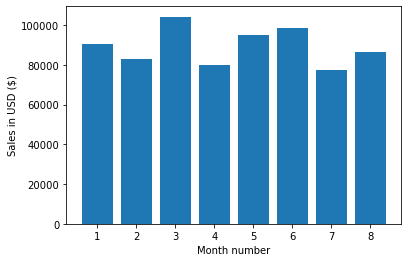

In [20]:
import matplotlib.pyplot as plt

months = range(1,9)
print(months)

plt.bar(months,all_data.groupby(['Month']).sum()['Sales'])
plt.xticks(months)
plt.ylabel('Sales in USD ($)')
plt.xlabel('Month number')
plt.show()

In [ ]:
#then we find which city having maximum num of sales of our accessorie

In [21]:
all_data.groupby(['City']).sum()

,Order ID,Quantity Ordered,Price Each,Month,Month 2,Month 3,Month 8,Sales
City,,,,,,,,
Atlanta (GA),55470733.0,328.0,47872.81,1295,1295,1295,1295,48157.73
Austin (TX),40554274.0,253.0,40240.11,957,957,957,957,40500.70
Boston (MA),77212067.0,462.0,63996.88,1849,1849,1849,1849,64960.83
Dallas (TX),54052107.0,336.0,54059.80,1277,1277,1277,1277,54411.90
Los Angeles (CA),126647654.0,756.0,119735.93,3078,3078,3078,3078,120416.05
New York City (NY),97421987.0,591.0,93326.01,2322,2322,2322,2322,93696.79
Portland (ME),7030359.0,41.0,9312.98,173,173,173,173,9334.75
Portland (OR),41834736.0,243.0,38987.86,1047,1047,1047,1047,39291.60
San Francisco (CA),181085685.0,1097.0,182338.24,4433,4433,4433,4433,185345.63


In [ ]:
#by plotting graph we find which city having maximum num of sales of our accessorie

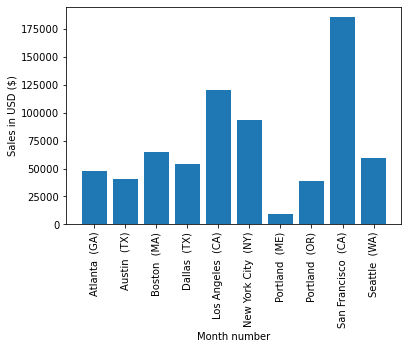

In [23]:
import matplotlib.pyplot as plt

keys = [city for city, df in all_data.groupby(['City'])]

plt.bar(keys,all_data.groupby(['City']).sum()['Sales'])
plt.ylabel('Sales in USD ($)')
plt.xlabel('Month number')
plt.xticks(keys, rotation='vertical', size=10)
plt.show()


In [ ]:
#we will find which the best time of geting maximum order of our accessories

In [24]:
all_data['Hour'] = pd.to_datetime(all_data['Order Date']).dt.hour
all_data['Minute'] = pd.to_datetime(all_data['Order Date']).dt.minute
all_data['Count'] = 1
all_data.head()

,Order ID,Accessorie,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Month 2,Month 3,Month 8,City,Sales,Hour,Minute,Count
0,176558.0,Sunglasses,2.0,11.95,4/19/2019 8:46,"917 1st St, Dallas, TX 75001",4,4,4,4,Dallas (TX),23.90,8,46,1
2,176559.0,Necklace,1.0,99.99,4/7/2019 22:30,"682 Chestnut St, Boston, MA 02215",4,4,4,4,Boston (MA),99.99,22,30,1
3,176560.0,Watch,1.0,600.00,4/12/2019 14:38,"669 Spruce St, Los Angeles, CA 90001",4,4,4,4,Los Angeles (CA),600.00,14,38,1
4,176560.0,Socks,1.0,11.99,4/12/2019 14:38,"669 Spruce St, Los Angeles, CA 90001",4,4,4,4,Los Angeles (CA),11.99,14,38,1
5,176561.0,Tie,1.0,11.99,4/30/2019 9:27,"333 8th St, Los Angeles, CA 90001",4,4,4,4,Los Angeles (CA),11.99,9,27,1


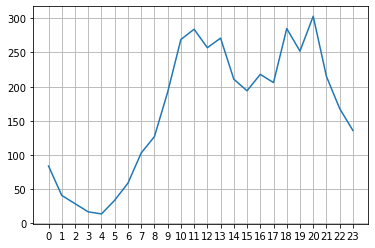

In [25]:
keys = [pair for pair, df in all_data.groupby(['Hour'])]

plt.plot(keys, all_data.groupby(['Hour']).count()['Count'])
plt.xticks(keys)
plt.grid()
plt.show()

In [27]:
df = all_data[all_data['Order ID'].duplicated(keep=False)]
df['Grouped'] = df.groupby('Order ID')['Accessorie'].transform(lambda x: ','.join(x))
df2 = df[['Order ID', 'Grouped']].drop_duplicates()

<ipython-input-27-7e2c85285a4d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Grouped'] = df.groupby('Order ID')['Accessorie'].transform(lambda x: ','.join(x))


In [ ]:
#we will find which to accessorie are mostly sold and ordered together

In [28]:
from itertools import combinations
from collections import Counter

count = Counter()

for row in df2['Grouped']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list, 2)))

for key,value in count.most_common(10):
    print(key, value)

('Apron', 'Necklace') 17
('Watch', 'Socks') 12
('Tie', 'Bow tie') 11
('Ring', 'Gloves') 11
('Gloves', 'Sunglasses') 9
('Necklace', 'Watch') 9
('Sunglasses', 'Apron') 8
('Gloves', 'Scarf') 8
('Mittens', 'Stockings') 8
('Boots', 'Mittens') 7


In [ ]:
#thn we find whih accesorie sold the most or having maximum num of orders 

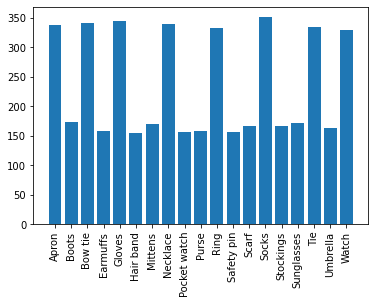

In [30]:
Accessorie_group = all_data.groupby('Accessorie')
quantity_ordered = Accessorie_group.sum()['Quantity Ordered']

keys = [pair for pair, df in Accessorie_group]
plt.bar(keys, quantity_ordered)
plt.xticks(keys, rotation='vertical', size=10)
plt.show()

<ipython-input-33-146182023640>:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(keys, rotation='vertical', size=10)
<ipython-input-33-146182023640>:14: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


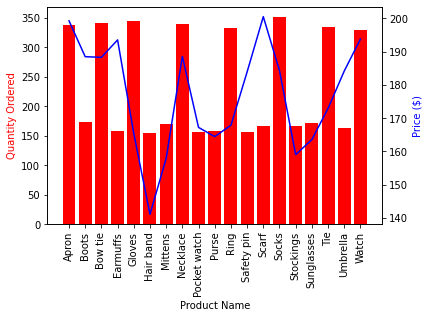

In [33]:
prices = all_data.groupby('Accessorie').mean()['Price Each']

fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.bar(keys, quantity_ordered, color='r')
ax2.plot(keys, prices, color='b')

ax1.set_xlabel('Product Name')
ax1.set_ylabel('Quantity Ordered', color='r')
ax2.set_ylabel('Price ($)', color='b')
ax1.set_xticklabels(keys, rotation='vertical', size=10)

fig.show()
